In [7]:
from keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization
import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
import os
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.mobilenet import preprocess_input
from imutils.object_detection import non_max_suppression
import numpy as np
import imutils
import cv2
from matplotlib import pyplot as plt

In [8]:
def create_model():
    model = keras.models.load_model('save_model/finetune_models.h5')
    return model

In [9]:
model = create_model()

In [10]:
def sliding_window(image, step, ws):
    for y in range(0, image.shape[0] - ws[1], step):
        for x in range(0, image.shape[1] - ws[0], step):
            yield (x, y, image[y:y + ws[1], x:x + ws[0]])

In [11]:
def image_pyramid(image, scale=1.5, minSize=(224, 224)):
    yield image
    while True:
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        yield image

In [14]:
WIDTH = 800
PYR_SCALE = 1.5
WIN_STEP = 16
ROI_SIZE = (220, 150)
INPUT_SIZE = (224, 224)

In [17]:
orig = cv2.imread("test/Javasparrow.jpg")
orig = imutils.resize(orig, width=WIDTH)
mainimg = orig.copy()
mainimg = cv2.cvtColor(mainimg, cv2.COLOR_BGR2RGB)
(H, W) = orig.shape[:2]

Text(0.5, 1.0, 'RGB')

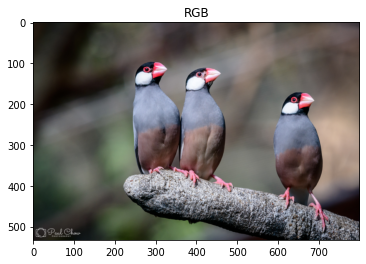

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
plt.imshow(mainimg)
plt.title('RGB')

In [30]:
pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)

In [31]:
rois = []
locs = []

In [32]:
bird_dict = {0: 'ABBOTTS BABBLER', 1: 'ABBOTTS BOOBY', 2: 'ABYSSINIAN GROUND HORNBILL', 3: 'AFRICAN CROWNED CRANE', 4: 'AFRICAN EMERALD CUCKOO', 5: 'AFRICAN FIREFINCH', 6: 'AFRICAN OYSTER CATCHER', 7: 'ALBATROSS', 8: 'ALBERTS TOWHEE', 9: 'ALEXANDRINE PARAKEET', 10: 'ALPINE CHOUGH', 11: 'ALTAMIRA YELLOWTHROAT', 12: 'AMERICAN AVOCET', 13: 'AMERICAN BITTERN', 14: 'AMERICAN COOT', 15: 'AMERICAN GOLDFINCH', 16: 'AMERICAN KESTREL', 17: 'AMERICAN PIPIT', 18: 'AMERICAN REDSTART', 19: 'AMETHYST WOODSTAR', 20: 'ANDEAN GOOSE', 21: 'ANDEAN LAPWING', 22: 'ANDEAN SISKIN', 23: 'ANHINGA', 24: 'ANIANIAU', 25: 'ANNAS HUMMINGBIRD', 26: 'ANTBIRD', 27: 'ANTILLEAN EUPHONIA', 28: 'APAPANE', 29: 'APOSTLEBIRD', 30: 'ARARIPE MANAKIN', 31: 'ASHY THRUSHBIRD', 32: 'ASIAN CRESTED IBIS', 33: 'AVADAVAT', 34: 'AZURE JAY', 35: 'AZURE TANAGER', 36: 'AZURE TIT', 37: 'BAIKAL TEAL', 38: 'BALD EAGLE', 39: 'BALD IBIS', 40: 'BALI STARLING', 41: 'BALTIMORE ORIOLE', 42: 'BANANAQUIT', 43: 'BAND TAILED GUAN', 44: 'BANDED BROADBILL', 45: 'BANDED PITA', 46: 'BANDED STILT', 47: 'BAR-TAILED GODWIT', 48: 'BARN OWL', 49: 'BARN SWALLOW', 50: 'BARRED PUFFBIRD', 51: 'BARROWS GOLDENEYE', 52: 'BAY-BREASTED WARBLER', 53: 'BEARDED BARBET', 54: 'BEARDED BELLBIRD', 55: 'BEARDED REEDLING', 56: 'BELTED KINGFISHER', 57: 'BIRD OF PARADISE', 58: 'BLACK & YELLOW BROADBILL', 59: 'BLACK BAZA', 60: 'BLACK COCKATO', 61: 'BLACK FRANCOLIN', 62: 'BLACK SKIMMER', 63: 'BLACK SWAN', 64: 'BLACK TAIL CRAKE', 65: 'BLACK THROATED BUSHTIT', 66: 'BLACK THROATED WARBLER', 67: 'BLACK VULTURE', 68: 'BLACK-CAPPED CHICKADEE', 69: 'BLACK-NECKED GREBE', 70: 'BLACK-THROATED SPARROW', 71: 'BLACKBURNIAM WARBLER', 72: 'BLONDE CRESTED WOODPECKER', 73: 'BLUE COAU', 74: 'BLUE GROUSE', 75: 'BLUE HERON', 76: 'BLUE THROATED TOUCANET', 77: 'BOBOLINK', 78: 'BORNEAN BRISTLEHEAD', 79: 'BORNEAN LEAFBIRD', 80: 'BORNEAN PHEASANT', 81: 'BRANDT CORMARANT', 82: 'BROWN CREPPER', 83: 'BROWN NOODY', 84: 'BROWN THRASHER', 85: 'BULWERS PHEASANT', 86: 'BUSH TURKEY', 87: 'CACTUS WREN', 88: 'CALIFORNIA CONDOR', 89: 'CALIFORNIA GULL', 90: 'CALIFORNIA QUAIL', 91: 'CANARY', 92: 'CAPE GLOSSY STARLING', 93: 'CAPE LONGCLAW', 94: 'CAPE MAY WARBLER', 95: 'CAPE ROCK THRUSH', 96: 'CAPPED HERON', 97: 'CAPUCHINBIRD', 98: 'CARMINE BEE-EATER', 99: 'CASPIAN TERN', 100: 'CASSOWARY', 101: 'CEDAR WAXWING', 102: 'CERULEAN WARBLER', 103: 'CHARA DE COLLAR', 104: 'CHATTERING LORY', 105: 'CHESTNET BELLIED EUPHONIA', 106: 'CHINESE BAMBOO PARTRIDGE', 107: 'CHINESE POND HERON', 108: 'CHIPPING SPARROW', 109: 'CHUCAO TAPACULO', 110: 'CHUKAR PARTRIDGE', 111: 'CINNAMON ATTILA', 112: 'CINNAMON FLYCATCHER', 113: 'CINNAMON TEAL', 114: 'CLARKS NUTCRACKER', 115: 'COCK OF THE  ROCK', 116: 'COCKATOO', 117: 'COLLARED ARACARI', 118: 'COMMON FIRECREST', 119: 'COMMON GRACKLE', 120: 'COMMON HOUSE MARTIN', 121: 'COMMON IORA', 122: 'COMMON LOON', 123: 'COMMON POORWILL', 124: 'COMMON STARLING', 125: 'COPPERY TAILED COUCAL', 126: 'CRAB PLOVER', 127: 'CRANE HAWK', 128: 'CREAM COLORED WOODPECKER', 129: 'CRESTED AUKLET', 130: 'CRESTED CARACARA', 131: 'CRESTED COUA', 132: 'CRESTED FIREBACK', 133: 'CRESTED KINGFISHER', 134: 'CRESTED NUTHATCH', 135: 'CRESTED OROPENDOLA', 136: 'CRESTED SHRIKETIT', 137: 'CRIMSON CHAT', 138: 'CRIMSON SUNBIRD', 139: 'CROW', 140: 'CROWNED PIGEON', 141: 'CUBAN TODY', 142: 'CUBAN TROGON', 143: 'CURL CRESTED ARACURI', 144: 'D-ARNAUDS BARBET', 145: 'DARK EYED JUNCO', 146: 'DEMOISELLE CRANE', 147: 'DOUBLE BARRED FINCH', 148: 'DOUBLE BRESTED CORMARANT', 149: 'DOUBLE EYED FIG PARROT', 150: 'DOWNY WOODPECKER', 151: 'DUSKY LORY', 152: 'EARED PITA', 153: 'EASTERN BLUEBIRD', 154: 'EASTERN GOLDEN WEAVER', 155: 'EASTERN MEADOWLARK', 156: 'EASTERN ROSELLA', 157: 'EASTERN TOWEE', 158: 'ELEGANT TROGON', 159: 'ELLIOTS  PHEASANT', 160: 'EMERALD TANAGER', 161: 'EMPEROR PENGUIN', 162: 'EMU', 163: 'ENGGANO MYNA', 164: 'EURASIAN GOLDEN ORIOLE', 165: 'EURASIAN MAGPIE', 166: 'EUROPEAN GOLDFINCH', 167: 'EUROPEAN TURTLE DOVE', 168: 'EVENING GROSBEAK', 169: 'FAIRY BLUEBIRD', 170: 'FAIRY TERN', 171: 'FIORDLAND PENGUIN', 172: 'FIRE TAILLED MYZORNIS', 173: 'FLAME BOWERBIRD', 174: 'FLAME TANAGER', 175: 'FLAMINGO', 176: 'FRIGATE', 177: 'GAMBELS QUAIL', 178: 'GANG GANG COCKATOO', 179: 'GILA WOODPECKER', 180: 'GILDED FLICKER', 181: 'GLOSSY IBIS', 182: 'GO AWAY BIRD', 183: 'GOLD WING WARBLER', 184: 'GOLDEN CHEEKED WARBLER', 185: 'GOLDEN CHLOROPHONIA', 186: 'GOLDEN EAGLE', 187: 'GOLDEN PHEASANT', 188: 'GOLDEN PIPIT', 189: 'GOULDIAN FINCH', 190: 'GRAY CATBIRD', 191: 'GRAY KINGBIRD', 192: 'GRAY PARTRIDGE', 193: 'GREAT GRAY OWL', 194: 'GREAT JACAMAR', 195: 'GREAT KISKADEE', 196: 'GREAT POTOO', 197: 'GREATOR SAGE GROUSE', 198: 'GREEN BROADBILL', 199: 'GREEN JAY', 200: 'GREEN MAGPIE', 201: 'GREY PLOVER', 202: 'GROVED BILLED ANI', 203: 'GUINEA TURACO', 204: 'GUINEAFOWL', 205: 'GURNEYS PITTA', 206: 'GYRFALCON', 207: 'HAMMERKOP', 208: 'HARLEQUIN DUCK', 209: 'HARLEQUIN QUAIL', 210: 'HARPY EAGLE', 211: 'HAWAIIAN GOOSE', 212: 'HAWFINCH', 213: 'HELMET VANGA', 214: 'HEPATIC TANAGER', 215: 'HIMALAYAN BLUETAIL', 216: 'HIMALAYAN MONAL', 217: 'HOATZIN', 218: 'HOODED MERGANSER', 219: 'HOOPOES', 220: 'HORNBILL', 221: 'HORNED GUAN', 222: 'HORNED LARK', 223: 'HORNED SUNGEM', 224: 'HOUSE FINCH', 225: 'HOUSE SPARROW', 226: 'HYACINTH MACAW', 227: 'IBERIAN MAGPIE', 228: 'IBISBILL', 229: 'IMPERIAL SHAQ', 230: 'INCA TERN', 231: 'INDIAN BUSTARD', 232: 'INDIAN PITTA', 233: 'INDIAN ROLLER', 234: 'INDIGO BUNTING', 235: 'INLAND DOTTEREL', 236: 'IVORY GULL', 237: 'IWI', 238: 'JABIRU', 239: 'JACK SNIPE', 240: 'JANDAYA PARAKEET', 241: 'JAPANESE ROBIN', 242: 'JAVA SPARROW', 243: 'KAGU', 244: 'KAKAPO', 245: 'KILLDEAR', 246: 'KING VULTURE', 247: 'KIWI', 248: 'KOOKABURRA', 249: 'LARK BUNTING', 250: 'LAZULI BUNTING', 251: 'LESSER ADJUTANT', 252: 'LILAC ROLLER', 253: 'LITTLE AUK', 254: 'LONG-EARED OWL', 255: 'MAGPIE GOOSE', 256: 'MALABAR HORNBILL', 257: 'MALACHITE KINGFISHER', 258: 'MALAGASY WHITE EYE', 259: 'MALEO', 260: 'MALLARD DUCK', 261: 'MANDRIN DUCK', 262: 'MANGROVE CUCKOO', 263: 'MARABOU STORK', 264: 'MASKED BOOBY', 265: 'MASKED LAPWING', 266: 'MIKADO  PHEASANT', 267: 'MOURNING DOVE', 268: 'MYNA', 269: 'NICOBAR PIGEON', 270: 'NOISY FRIARBIRD', 271: 'NORTHERN CARDINAL', 272: 'NORTHERN FLICKER', 273: 'NORTHERN FULMAR', 274: 'NORTHERN GANNET', 275: 'NORTHERN GOSHAWK', 276: 'NORTHERN JACANA', 277: 'NORTHERN MOCKINGBIRD', 278: 'NORTHERN PARULA', 279: 'NORTHERN RED BISHOP', 280: 'NORTHERN SHOVELER', 281: 'OCELLATED TURKEY', 282: 'OKINAWA RAIL', 283: 'ORANGE BRESTED BUNTING', 284: 'ORIENTAL BAY OWL', 285: 'OSPREY', 286: 'OSTRICH', 287: 'OVENBIRD', 288: 'OYSTER CATCHER', 289: 'PAINTED BUNTING', 290: 'PALILA', 291: 'PARADISE TANAGER', 292: 'PARAKETT  AKULET', 293: 'PARUS MAJOR', 294: 'PATAGONIAN SIERRA FINCH', 295: 'PEACOCK', 296: 'PELICAN', 297: 'PEREGRINE FALCON', 298: 'PHILIPPINE EAGLE', 299: 'PINK ROBIN', 300: 'POMARINE JAEGER', 301: 'PUFFIN', 302: 'PURPLE FINCH', 303: 'PURPLE GALLINULE', 304: 'PURPLE MARTIN', 305: 'PURPLE SWAMPHEN', 306: 'PYGMY KINGFISHER', 307: 'QUETZAL', 308: 'RAINBOW LORIKEET', 309: 'RAZORBILL', 310: 'RED BEARDED BEE EATER', 311: 'RED BELLIED PITTA', 312: 'RED BROWED FINCH', 313: 'RED FACED CORMORANT', 314: 'RED FACED WARBLER', 315: 'RED FODY', 316: 'RED HEADED DUCK', 317: 'RED HEADED WOODPECKER', 318: 'RED HONEY CREEPER', 319: 'RED NAPED TROGON', 320: 'RED TAILED HAWK', 321: 'RED TAILED THRUSH', 322: 'RED WINGED BLACKBIRD', 323: 'RED WISKERED BULBUL', 324: 'REGENT BOWERBIRD', 325: 'RING-NECKED PHEASANT', 326: 'ROADRUNNER', 327: 'ROBIN', 328: 'ROCK DOVE', 329: 'ROSY FACED LOVEBIRD', 330: 'ROUGH LEG BUZZARD', 331: 'ROYAL FLYCATCHER', 332: 'RUBY THROATED HUMMINGBIRD', 333: 'RUDY KINGFISHER', 334: 'RUFOUS KINGFISHER', 335: 'RUFUOS MOTMOT', 336: 'SAMATRAN THRUSH', 337: 'SAND MARTIN', 338: 'SANDHILL CRANE', 339: 'SATYR TRAGOPAN', 340: 'SCARLET CROWNED FRUIT DOVE', 341: 'SCARLET IBIS', 342: 'SCARLET MACAW', 343: 'SCARLET TANAGER', 344: 'SHOEBILL', 345: 'SHORT BILLED DOWITCHER', 346: 'SMITHS LONGSPUR', 347: 'SNOWY EGRET', 348: 'SNOWY OWL', 349: 'SORA', 350: 'SPANGLED COTINGA', 351: 'SPLENDID WREN', 352: 'SPOON BILED SANDPIPER', 353: 'SPOONBILL', 354: 'SPOTTED CATBIRD', 355: 'SRI LANKA BLUE MAGPIE', 356: 'STEAMER DUCK', 357: 'STORK BILLED KINGFISHER', 358: 'STRAWBERRY FINCH', 359: 'STRIPED OWL', 360: 'STRIPPED MANAKIN', 361: 'STRIPPED SWALLOW', 362: 'SUPERB STARLING', 363: 'SWINHOES PHEASANT', 364: 'TAILORBIRD', 365: 'TAIWAN MAGPIE', 366: 'TAKAHE', 367: 'TASMANIAN HEN', 368: 'TEAL DUCK', 369: 'TIT MOUSE', 370: 'TOUCHAN', 371: 'TOWNSENDS WARBLER', 372: 'TREE SWALLOW', 373: 'TROPICAL KINGBIRD', 374: 'TRUMPTER SWAN', 375: 'TURKEY VULTURE', 376: 'TURQUOISE MOTMOT', 377: 'UMBRELLA BIRD', 378: 'VARIED THRUSH', 379: 'VENEZUELIAN TROUPIAL', 380: 'VERMILION FLYCATHER', 381: 'VICTORIA CROWNED PIGEON', 382: 'VIOLET GREEN SWALLOW', 383: 'VIOLET TURACO', 384: 'VULTURINE GUINEAFOWL', 385: 'WALL CREAPER', 386: 'WATTLED CURASSOW', 387: 'WATTLED LAPWING', 388: 'WHIMBREL', 389: 'WHITE BROWED CRAKE', 390: 'WHITE CHEEKED TURACO', 391: 'WHITE NECKED RAVEN', 392: 'WHITE TAILED TROPIC', 393: 'WHITE THROATED BEE EATER', 394: 'WILD TURKEY', 395: 'WILSONS BIRD OF PARADISE', 396: 'WOOD DUCK', 397: 'YELLOW BELLIED FLOWERPECKER', 398: 'YELLOW CACIQUE', 399: 'YELLOW HEADED BLACKBIRD'}

In [33]:
for image in pyramid:
    scale = W / float(image.shape[1])
    for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
        x = int(x * scale)
        y = int(y * scale)
        w = int(ROI_SIZE[0] * scale)
        h = int(ROI_SIZE[1] * scale)
        roi = cv2.resize(roiOrig, INPUT_SIZE)
        roi = img_to_array(roi)
        roi = roi/255
        rois.append(roi)
        locs.append((x, y, x + w, y + h))
rois = np.array(rois)
preds = model.predict(rois)


prediction = []
for i in range(len(preds)):
    tup = (bird_dict[preds[i].argmax()],np.amax(preds[i]))
    prediction.append([tup])
preds = prediction
labels = {}

38/38 [==============================] - 3s 79ms/step


In [34]:
preds

[[('BULWERS PHEASANT', 0.53607213)],
 [('BULWERS PHEASANT', 0.6446966)],
 [('BULWERS PHEASANT', 0.42445475)],
 [('INCA TERN', 0.53421706)],
 [('EMPEROR PENGUIN', 0.39142329)],
 [('WOOD DUCK', 0.29368174)],
 [('WOOD DUCK', 0.5426643)],
 [('GOULDIAN FINCH', 0.5339755)],
 [('MANDRIN DUCK', 0.57834584)],
 [('GOULDIAN FINCH', 0.55065763)],
 [('GOULDIAN FINCH', 0.5679656)],
 [('GOULDIAN FINCH', 0.91805214)],
 [('GOULDIAN FINCH', 0.8045498)],
 [('GOULDIAN FINCH', 0.907845)],
 [('GOULDIAN FINCH', 0.8178349)],
 [('GOULDIAN FINCH', 0.94798595)],
 [('GOULDIAN FINCH', 0.99380255)],
 [('GOULDIAN FINCH', 0.9973018)],
 [('GOULDIAN FINCH', 0.9979442)],
 [('GOULDIAN FINCH', 0.99056035)],
 [('GOULDIAN FINCH', 0.9671225)],
 [('GOULDIAN FINCH', 0.8762801)],
 [('GOULDIAN FINCH', 0.9246758)],
 [('GOULDIAN FINCH', 0.50102156)],
 [('GOULDIAN FINCH', 0.6825408)],
 [('GOULDIAN FINCH', 0.7645745)],
 [('GOULDIAN FINCH', 0.9206002)],
 [('MALEO', 0.40621942)],
 [('INCA TERN', 0.5172727)],
 [('INCA TERN', 0.6402156)

In [35]:
for (i, p) in enumerate(preds):
    (label, prob) = p[0]
    if prob >= 0.995:
        box = locs[i]
        L = labels.get(label, [])
        L.append((box, prob))
        labels[label] = L

In [36]:
labels

{'GOULDIAN FINCH': [((272, 0, 492, 150), 0.9973018),
  ((288, 0, 508, 150), 0.9979442)],
 'JAVA SPARROW': [((368, 64, 588, 214), 0.9967204),
  ((288, 80, 508, 230), 0.9980574),
  ((304, 80, 524, 230), 0.99851507),
  ((320, 80, 540, 230), 0.9987213),
  ((336, 80, 556, 230), 0.99607545),
  ((352, 80, 572, 230), 0.99842227),
  ((368, 80, 588, 230), 0.99805534),
  ((384, 80, 604, 230), 0.9983341),
  ((208, 96, 428, 246), 0.9994629),
  ((240, 96, 460, 246), 0.99542147),
  ((304, 96, 524, 246), 0.9977621),
  ((320, 96, 540, 246), 0.9988355),
  ((336, 96, 556, 246), 0.9985745),
  ((352, 96, 572, 246), 0.9991009),
  ((368, 96, 588, 246), 0.99879444),
  ((384, 96, 604, 246), 0.9974776),
  ((208, 112, 428, 262), 0.99951744),
  ((224, 112, 444, 262), 0.99769884),
  ((240, 112, 460, 262), 0.9967824),
  ((304, 112, 524, 262), 0.99749124),
  ((320, 112, 540, 262), 0.99912804),
  ((336, 112, 556, 262), 0.9989575),
  ((352, 112, 572, 262), 0.99783903),
  ((112, 128, 332, 278), 0.9984054),
  ((128, 128

In [37]:
labels = {k: v for k, v in labels.items() if len(v) >= 10}

In [38]:
labels

{'JAVA SPARROW': [((368, 64, 588, 214), 0.9967204),
  ((288, 80, 508, 230), 0.9980574),
  ((304, 80, 524, 230), 0.99851507),
  ((320, 80, 540, 230), 0.9987213),
  ((336, 80, 556, 230), 0.99607545),
  ((352, 80, 572, 230), 0.99842227),
  ((368, 80, 588, 230), 0.99805534),
  ((384, 80, 604, 230), 0.9983341),
  ((208, 96, 428, 246), 0.9994629),
  ((240, 96, 460, 246), 0.99542147),
  ((304, 96, 524, 246), 0.9977621),
  ((320, 96, 540, 246), 0.9988355),
  ((336, 96, 556, 246), 0.9985745),
  ((352, 96, 572, 246), 0.9991009),
  ((368, 96, 588, 246), 0.99879444),
  ((384, 96, 604, 246), 0.9974776),
  ((208, 112, 428, 262), 0.99951744),
  ((224, 112, 444, 262), 0.99769884),
  ((240, 112, 460, 262), 0.9967824),
  ((304, 112, 524, 262), 0.99749124),
  ((320, 112, 540, 262), 0.99912804),
  ((336, 112, 556, 262), 0.9989575),
  ((352, 112, 572, 262), 0.99783903),
  ((112, 128, 332, 278), 0.9984054),
  ((128, 128, 348, 278), 0.9952506),
  ((144, 128, 364, 278), 0.99789536),
  ((160, 128, 380, 278), 0

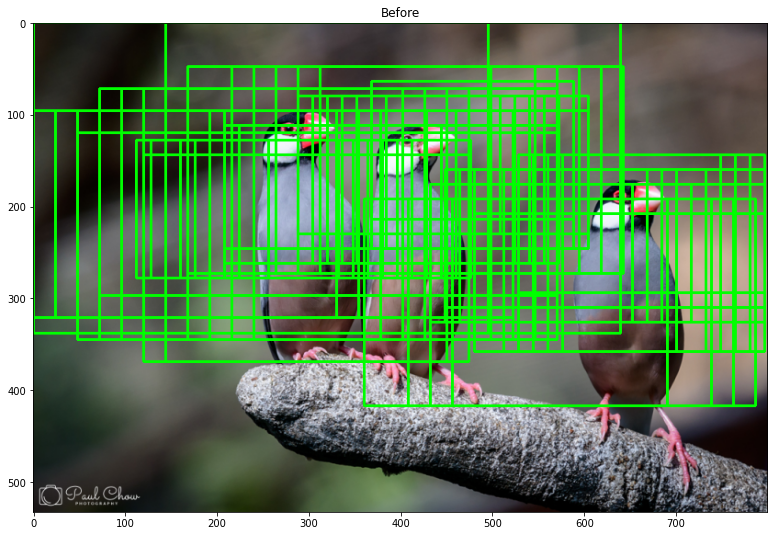

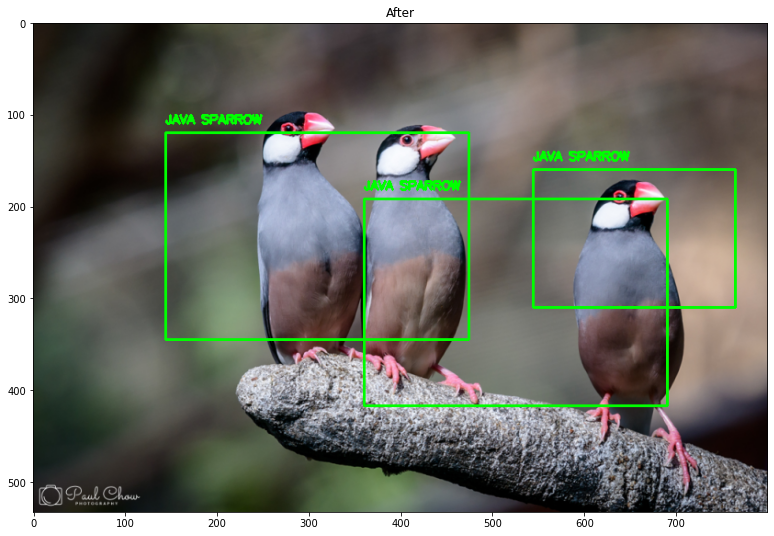

In [41]:
for label in labels.keys():
    clone = mainimg.copy()
    for (box, prob) in labels[label]:
        (startX, startY, endX, endY) = box
        cv2.rectangle(clone, (startX, startY), (endX, endY),
            (0, 255, 0), 2)
    plt.figure(figsize=(16,9))
    plt.subplot(1,1,1)
    plt.imshow(clone)
    plt.title('Before')
    clone = mainimg.copy()
    
    
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)
    for (startX, startY, endX, endY) in boxes:
        cv2.rectangle(clone, (startX, startY), (endX, endY),
            (0, 255, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(clone, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)
    plt.figure(figsize=(16,9))
    plt.subplot(1,1,1)
    plt.imshow(clone)
    plt.title('After')